In [3]:
import psycopg2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import scipy
#import plotly
#import plotly.graph_objs as go

#import plotly.plotly as py
#import cufflinks as cf
#from sklearn.metrics import r2_score

#from rpy2.robjects.packages import importr
#import rpy2.robjects as ro
#import warnings
#from collections import Counter

In [7]:
# #
# try:
#     connection = psycopg2.connect(user="sesyr",
#                                   password="SeSyR54",
#                                   host="51.254.68.36",
#                                   port="5432",
#                                   database="donnees_trafic")
#     cursor = connection.cursor()

#     # Print PostgreSQL version
#     cursor.execute("SELECT version();")
#     record = cursor.fetchone()
#     print("You are connected to - ", record,"\n")
    
#     postgreSQL_select_Query = """
#     WITH metadata AS (
#           SELECT ist.macrosection,
#          ist.code_centrale,
#          cnl.code_canal,
#          sc.sens,
#          cc.id_nature_mesure, cc.libelle
#         FROM rdv.info_section_troncon ist
#         JOIN rdv.sens_canal sc ON sc.sens::text = ist.sens::text
#     JOIN myrabel.centrale c ON c.code_centrale = ist.code_centrale::bpchar
#     JOIN myrabel.canal cnl ON cnl.id_centrale = c.id_centrale AND cnl.code_canal::text = sc.canal::text
#     JOIN myrabel.cal_canal cc ON cc.id_canal = cnl.id_canal AND cc.libelle ~~ '%QT_360 %'::text
    
#     ), metadatavt AS (
#           SELECT distinct ist.macrosection,
#          ist.code_centrale,
#          cnl.code_canal,
#          sc.sens,
#          cc.id_nature_mesure, cc.libelle
#         FROM rdv.info_section_troncon ist
#         JOIN rdv.sens_canal sc ON sc.sens::text = ist.sens::text
#     JOIN myrabel.centrale c ON c.code_centrale = ist.code_centrale::bpchar
#     JOIN myrabel.canal cnl ON cnl.id_centrale = c.id_centrale AND cnl.code_canal::text = sc.canal::text
#     JOIN myrabel.cal_canal cc ON cc.id_canal = cnl.id_canal AND cc.libelle ~~ '%VT_360 %'::text
#     )
    
#     SELECT 
       
#        m.macrosection,
#        m.sens,
#        m.code_centrale,
#        m.code_canal, 
       
        
#        ts,
#        dq.valeur AS qt,
#        dv.valeur AS vt
       
       
#       FROM metadata  m
#       JOIN metadatavt v
#       ON m.macrosection = v.macrosection AND m.sens = v.sens AND m.code_centrale = v.code_centrale AND  m.code_canal=  v.code_canal
      
#       CROSS JOIN generate_series('2017-05-01' , '2017-05-02','00:06:00'::interval) AS  ts(ts)
      
#       LEFT JOIN myrabel.mesure_2 dq    
#       ON dq.id_nature_mesure = m.id_nature_mesure
#       AND dq.date_mesure = ts 
      
#         LEFT JOIN myrabel.mesure_2 dv    
#       ON dv.id_nature_mesure = v.id_nature_mesure
#       AND dv.date_mesure = ts
      
      
#         --WHERE(  dv.date_mesure IS NULL OR dq.date_mesure IS NULL OR dv.date_mesure = dq.date_mesure )
      
#      -- WHERE dq.date_mesure IS NOT  NULL AND dv.date_mesure IS NULL  --OR dq.date_mesure IS NULL
      
#       """
    

#     cursor.execute(postgreSQL_select_Query)
#     print("Selecting rows from mobile table using cursor.fetchall")
#     records = cursor.fetchall() 
   
#    # print("Print each row and it's columns values")
#    #for row in records:
#        #   print("Macrosection = ", row[0])
#         #  print("sens = ", row[1])
#          # print("code centrale   = ", row[2])
#           #print(" code canal = ", row[3])
#         #  print("date_mesure = ", row[4])
#          # print("qt_360 = ", row[5]) 
#           #print("Vt_360 = ", row[6],"\n" )
            
            
# except (Exception, psycopg2.Error) as error :
#     print ("Error while connecting to PostgreSQL", error)
        
# finally:
#     #closing database connection.
#         if(connection):
#             cursor.close()
#             connection.close()
#             print("PostgreSQL connection is closed")            

You are connected to -  ('PostgreSQL 10.5 on x86_64-pc-linux-gnu, compiled by gcc (GCC) 4.8.5 20150623 (Red Hat 4.8.5-28), 64-bit',) 

Selecting rows from mobile table using cursor.fetchall
PostgreSQL connection is closed


In [4]:
try:
    connection = psycopg2.connect(user="sesyr",
                                  password="SeSyR54",
                                  host="51.254.68.36",
                                  port="5432",
                                  database="donnees_trafic")
    cursor = connection.cursor()

    # Print PostgreSQL version
    cursor.execute("SELECT version();")
    record = cursor.fetchone()
    print("You are connected to - ", record,"\n")
    
    postgreSQL_select_Query = """
    WITH metadata AS (
          SELECT ist.macrosection,
         ist.code_centrale,
         cnl.code_canal,
         sc.sens,
         cc.id_nature_mesure, cc.libelle
        FROM rdv.info_section_troncon ist
        JOIN rdv.sens_canal sc ON sc.sens::text = ist.sens::text
    JOIN myrabel.centrale c ON c.code_centrale = ist.code_centrale::bpchar
    JOIN myrabel.canal cnl ON cnl.id_centrale = c.id_centrale AND cnl.code_canal::text = sc.canal::text
    JOIN myrabel.cal_canal cc ON cc.id_canal = cnl.id_canal AND cc.libelle ~~ '%QT_360 %'::text
    
    ), metadatavt AS (
          SELECT distinct ist.macrosection,
         ist.code_centrale,
         cnl.code_canal,
         sc.sens,
         cc.id_nature_mesure, cc.libelle
        FROM rdv.info_section_troncon ist
        JOIN rdv.sens_canal sc ON sc.sens::text = ist.sens::text
    JOIN myrabel.centrale c ON c.code_centrale = ist.code_centrale::bpchar
    JOIN myrabel.canal cnl ON cnl.id_centrale = c.id_centrale AND cnl.code_canal::text = sc.canal::text
    JOIN myrabel.cal_canal cc ON cc.id_canal = cnl.id_canal AND cc.libelle ~~ '%VT_360 %'::text
    )
    
    SELECT 
       
       m.macrosection,
       m.sens,
       m.code_centrale,
       m.code_canal, 
       
        
       ts,
       dq.valeur AS qt,
       dv.valeur AS vt
       
       
      FROM metadata  m
      JOIN metadatavt v
      ON m.macrosection = v.macrosection AND m.sens = v.sens AND m.code_centrale = v.code_centrale AND  m.code_canal=  v.code_canal
      
      CROSS JOIN generate_series('2017-05-01' , '2017-05-07','00:06:00'::interval) AS  ts(ts)
      
      LEFT JOIN myrabel.mesure_2 dq    
      ON dq.id_nature_mesure = m.id_nature_mesure
      AND dq.date_mesure = ts 
      
        LEFT JOIN myrabel.mesure_2 dv    
      ON dv.id_nature_mesure = v.id_nature_mesure
      AND dv.date_mesure = ts
      
      
        --WHERE(  dv.date_mesure IS NULL OR dq.date_mesure IS NULL OR dv.date_mesure = dq.date_mesure )
      
     -- WHERE dq.date_mesure IS NOT  NULL AND dv.date_mesure IS NULL  --OR dq.date_mesure IS NULL
      
      """
    

    cursor.execute(postgreSQL_select_Query)
    print("Selecting rows from mobile table using cursor.fetchall")
    records = cursor.fetchall() 
   
   # print("Print each row and it's columns values")
   #for row in records:
       #   print("Macrosection = ", row[0])
        #  print("sens = ", row[1])
         # print("code centrale   = ", row[2])
          #print(" code canal = ", row[3])
        #  print("date_mesure = ", row[4])
         # print("qt_360 = ", row[5]) 
          #print("Vt_360 = ", row[6],"\n" )
            
            
except (Exception, psycopg2.Error) as error :
    print ("Error while connecting to PostgreSQL", error)
        
finally:
    #closing database connection.
        if(connection):
            cursor.close()
            connection.close()
            print("PostgreSQL connection is closed")            

You are connected to -  ('PostgreSQL 10.5 on x86_64-pc-linux-gnu, compiled by gcc (GCC) 4.8.5 20150623 (Red Hat 4.8.5-28), 64-bit',) 

Selecting rows from mobile table using cursor.fetchall
PostgreSQL connection is closed


In [5]:
df = pd.DataFrame(records, columns=['Macrosection','sens','code_centrale','code_canal','date','qt_360','vt_360'])

#strip code canal which is a char of 3 character with whitespace

df['code_canal'] = df['code_canal'].str.strip()

# add a column that its default value is np.nan

# df.missing

#sorting dates ?
#df = df.sort_values('date')

# replace zeros also with NAN

df = df.replace(0,np.NaN) # np.NaN ca va marcher , np.nan doesnt work anymore !!

# Descriptive Statistics

df.head()

,Macrosection,sens,code_centrale,code_canal,date,qt_360,vt_360
0,I11,SENS_1,MZE54.3,0,2017-05-01 00:00:00+02:00,33.0,97.0
1,I11,SENS_1,MZE54.3,0,2017-05-01 00:06:00+02:00,26.0,95.0
2,I11,SENS_1,MZE54.3,0,2017-05-01 00:12:00+02:00,36.0,98.0
3,I11,SENS_1,MZE54.3,0,2017-05-01 00:18:00+02:00,29.0,96.0
4,I11,SENS_1,MZE54.3,0,2017-05-01 00:24:00+02:00,37.0,94.0


In [6]:
DataFrameDict=df.groupby(['code_canal','code_centrale'])
    
#print to s
for key, item in DataFrameDict:
    print(DataFrameDict.get_group(key).count(), "\n\n")
    #DataFrameDict.get_group(key).to_csv(r'C:\Users\hp\Desktop\Stage IOT TS\devellopement\grouping_by_codes'+ str(key) +'.csv')   


Macrosection     1441
sens             1441
code_centrale    1441
code_canal       1441
date             1441
qt_360           1441
vt_360           1441
dtype: int64 


Macrosection     1441
sens             1441
code_centrale    1441
code_canal       1441
date             1441
qt_360           1441
vt_360           1441
dtype: int64 


Macrosection     1441
sens             1441
code_centrale    1441
code_canal       1441
date             1441
qt_360           1441
vt_360           1441
dtype: int64 


Macrosection     1441
sens             1441
code_centrale    1441
code_canal       1441
date             1441
qt_360           1440
vt_360           1440
dtype: int64 


Macrosection     1441
sens             1441
code_centrale    1441
code_canal       1441
date             1441
qt_360           1440
vt_360           1440
dtype: int64 


Macrosection     1441
sens             1441
code_centrale    1441
code_canal       1441
date             1441
qt_360           1440
vt_360           1

In [9]:
display(DataFrameDict.describe())

#dd.to_csv(r'C:\Users\hp\Desktop\Stage IOT TS\devellopement\the whole data grouped.csv')   

#add periodicity /  

qt_360                                             \
                           count        mean         std  min    25%    50%   
code_canal code_centrale                                                      
0          MZE54.3        1441.0  131.997224  101.243642  3.0  35.00  119.0   
           MZE54.H        1441.0  131.937543  104.571196  2.0  32.00  119.0   
           SITE_03        1441.0   74.525330   42.641524  2.0  30.00   81.0   
           SITE_05        1440.0   81.536111   50.428037  1.0  30.75   85.0   
           SITE_08        1440.0   85.266667   53.655696  2.0  30.00   90.0   
1          MZE54.3        1440.0  138.448611  104.295013  1.0  35.75  143.0   
           MZE54.4        1441.0  114.712006   91.762312  1.0  29.00  116.0   
           MZE54.H        1441.0  114.734906   84.507736  1.0  31.00  117.0   
           MZE54.K        1441.0  115.067314   91.117928  1.0  28.00  114.0   
           SITE_01        1434.0   36.077406   22.172867  1.0  13.00   42.0   
           SITE_03        1440.0   80.993750   47.843422  1.0  32.00   97.0   
           SITE_05        1439.0   82.904100   49.321395  1.0  32.00   98.0   
           SITE_08        1393.0   11.485284    6.959445  1.0   6.00   10.0   
           SITE_09        1407.0   24.641791   16.507627  1.0  10.00   21.0   
2          MZE54.H        1115.0    5.084305    3.804712  1.0   2.00    4.0   
           SITE_03        1329.0   62.112114   63.156315  1.0   7.00   47.0   
           SITE_05        1352.0   53.303994   54.068890  1.0   6.00   40.0   
           SITE_08        1279.0   52.719312   55.819967  1.0   5.00   41.0   
3          MZE54.H        1311.0   25.618612   28.699247  1.0   5.00   18.0   
           SITE_01        1228.0   28.249186   27.400821  1.0   4.00   24.0   
           SITE_03        1308.0   62.609327   60.093547  1.0   7.00   53.0   
           SITE_05        1326.0   59.076923   59.223696  1.0   6.00   48.0   
           SITE_08        1439.0   76.037526   52.632917  1.0  23.00   86.0   
           SITE_09        1441.0   66.545455   42.590192  1.0  25.00   73.0   
5          SITE_01        1435.0   60.134495   44.403163  1.0  18.00   54.0   
           SITE_08        1416.0   48.093927   47.870633  1.0   6.00   39.0   
           SITE_09        1314.0   56.412481   54.065307  1.0   7.00   51.0   

                                        vt_360                         \
                            75%    max   count        mean        std   
code_canal code_centrale                                                
0          MZE54.3        203.0  400.0  1441.0   96.670368   6.269992   
           MZE54.H        202.0  450.0  1441.0   90.819570   7.139050   
           SITE_03        113.0  158.0  1441.0   94.820191   7.726319   
           SITE_05        124.0  209.0  1440.0   94.586821   9.625664   
           SITE_08        132.0  205.0  1440.0   84.723101   4.843318   
1          MZE54.3        211.0  414.0  1440.0   96.886806   7.808361   
           MZE54.4        173.0  461.0  1441.0  103.768217  10.180543   
           MZE54.H        177.0  358.0  1441.0   98.566273   6.709545   
           MZE54.K        176.0  433.0  1441.0   98.297016  10.073855   
           SITE_01         55.0   85.0  1435.0  101.315459   7.141055   
           SITE_03        121.0  175.0  1440.0   97.071148   8.716751   
           SITE_05        126.0  184.0  1439.0  100.883613   7.601301   
           SITE_08         17.0   49.0     0.0         NaN        NaN   
           SITE_09         40.0   70.0  1406.0   79.502892   8.720692   
2          MZE54.H          7.0   20.0  1114.0   59.887792   6.095745   
           SITE_03         93.0  281.0  1306.0  107.896635  10.155950   
           SITE_05         80.0  228.0  1344.0  108.659105  12.098987   
           SITE_08         77.0  246.0  1259.0   93.042972   6.679930   
3          MZE54.H         35.0  171.0  1309.0   53.873950   3.692935   
           SITE_01         40.0  139.0  1214.0  1

In [10]:
#store data in alias dictionary

DataGp = {elem : pd.DataFrame for elem,it in DataFrameDict}

for key in DataGp.keys():
        print(key,end ="  ")
        DataGp[key] = DataFrameDict.get_group(key)
#27 groups        

('0', 'MZE54.3')  ('0', 'MZE54.H')  ('0', 'SITE_03')  ('0', 'SITE_05')  ('0', 'SITE_08')  ('1', 'MZE54.3')  ('1', 'MZE54.4')  ('1', 'MZE54.H')  ('1', 'MZE54.K')  ('1', 'SITE_01')  ('1', 'SITE_03')  ('1', 'SITE_05')  ('1', 'SITE_08')  ('1', 'SITE_09')  ('2', 'MZE54.H')  ('2', 'SITE_03')  ('2', 'SITE_05')  ('2', 'SITE_08')  ('3', 'MZE54.H')  ('3', 'SITE_01')  ('3', 'SITE_03')  ('3', 'SITE_05')  ('3', 'SITE_08')  ('3', 'SITE_09')  ('5', 'SITE_01')  ('5', 'SITE_08')  ('5', 'SITE_09')  

In [22]:
# indexing time for plotting
for key in DataGp.keys():
    DataGp[key].date = pd.to_datetime(DataGp[key].date, format='%d/%b/%Y:%H:%M:%S', utc=False)
    DataGp[key]= DataGp[key].set_index('date')

DataGp

C:\Users\hp\Anaconda3\envs\Data_imputation\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


{('0',
  'MZE54.3'):                           Macrosection    sens code_centrale code_canal  \
 date                                                                      
 2017-05-01 00:00:00+02:00          I11  SENS_1       MZE54.3          0   
 2017-05-01 00:06:00+02:00          I11  SENS_1       MZE54.3          0   
 2017-05-01 00:12:00+02:00          I11  SENS_1       MZE54.3          0   
 2017-05-01 00:18:00+02:00          I11  SENS_1       MZE54.3          0   
 2017-05-01 00:24:00+02:00          I11  SENS_1       MZE54.3          0   
 2017-05-01 00:30:00+02:00          I11  SENS_1       MZE54.3          0   
 2017-05-01 00:36:00+02:00          I11  SENS_1       MZE54.3          0   
 2017-05-01 00:42:00+02:00          I11  SENS_1       MZE54.3          0   
 2017-05-01 00:48:00+02:00          I11  SENS_1       MZE54.3          0   
 2017-05-01 00:54:00+02:00          I11  SENS_1       MZE54.3          0   
 2017-05-01 01:00:00+02:00          I11  SENS_1       MZE54.3       

In [56]:
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.pipeline import FeatureUnion, make_pipeline

Missingkey=('2', 'SITE_03')

Y=DataGp[Missingkey].copy()
reference=Y.dropna()
reference= reference[['qt_360' , 'vt_360']]
reference.head()

mask = np.random.randint(0,2, size=reference.shape[0]).astype(np.bool)

df_mask=reference[['qt_360' , 'vt_360']]

df_mask[mask]=np.nan

df_mask.isna().sum()


qt_360    663
vt_360    663
dtype: int64

In [57]:
df_mask.head()

,qt_360,vt_360
date,,
2017-05-01 00:00:00+02:00,NaN,NaN
2017-05-01 00:06:00+02:00,NaN,NaN
2017-05-01 00:12:00+02:00,2.0,111.0
2017-05-01 00:18:00+02:00,NaN,NaN
2017-05-01 00:24:00+02:00,NaN,NaN


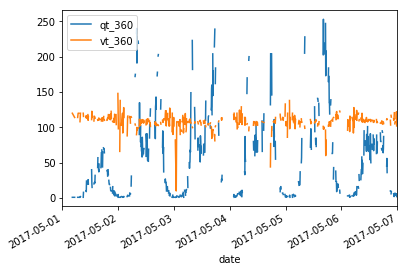

In [58]:
df_mask.plot()

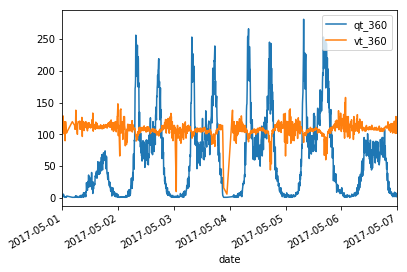

In [26]:
reference.plot()

In [61]:
#for simplifying df_1 is the alias of datagp in Missingkey=('2', 'SITE_03') which has a lot of missing values
df_1=df_mask
#df_1[['vt_360','InterpolateLinear_vt']].plot(style=styles,figsize=(20,15));


In [62]:

#filling using mean and interpolation

# for speed

df_1 = df_1.assign(FillMean_vt=df_1.vt_360.fillna(df_1.vt_360.mean()))
df_1 = df_1.assign(FillMedian_vt=df_1.vt_360.fillna(df_1.vt_360.median()))


# for debit st
df_1 = df_1.assign(FillMean_qt=df_1.qt_360.fillna(df_1.qt_360.mean()))
df_1 = df_1.assign(FillMedian_qt=df_1.qt_360.fillna(df_1.qt_360.median()))

df_1.head()


,qt_360,vt_360,FillMean_vt,FillMedian_vt,FillMean_qt,FillMedian_qt
date,,,,,,
2017-05-01 00:00:00+02:00,NaN,NaN,107.994382,108.0,60.043546,44.0
2017-05-01 00:06:00+02:00,NaN,NaN,107.994382,108.0,60.043546,44.0
2017-05-01 00:12:00+02:00,2.0,111.0,111.000000,111.0,2.000000,2.0
2017-05-01 00:18:00+02:00,NaN,NaN,107.994382,108.0,60.043546,44.0
2017-05-01 00:24:00+02:00,NaN,NaN,107.994382,108.0,60.043546,44.0


In [63]:


df_1 = df_1.assign(InterpolateLinear_qt=df_1.qt_360.interpolate(method='linear'))

df_1 = df_1.assign(InterpolateTime_qt=df_1.qt_360.interpolate(method='time'))

df_1 = df_1.assign(InterpolateSLinear_qt=df_1.qt_360.interpolate(method='slinear')) #spline 

df_1 = df_1.assign(InterpolateQuadratic_qt=df_1.qt_360.interpolate(method='quadratic'))

df_1 = df_1.assign(InterpolateCubic_qt=df_1.qt_360.interpolate(method='cubic'))

#df_1 = df_1.assign(InterpolateAkima_qt=df_1.qt_360.interpolate(method='akima')) the worst

df_1 = df_1.assign(InterpolatePoly5_qt=df_1.qt_360.interpolate(method='polynomial', order=5)) 

df_1 = df_1.assign(InterpolatePoly7_qt=df_1.qt_360.interpolate(method='polynomial', order=7))

df_1 = df_1.assign(InterpolateSpline3_qt=df_1.qt_360.interpolate(method='spline', order=3))

df_1 = df_1.assign(InterpolateSpline4_qt=df_1.qt_360.interpolate(method='spline', order=4))

df_1 = df_1.assign(InterpolateSpline5_qt=df_1.qt_360.interpolate(method='spline', order=5))


#speed
df_1 = df_1.assign(InterpolateLinear_vt=df_1.vt_360.interpolate(method='linear'))

df_1 = df_1.assign(InterpolateTime_vt=df_1.vt_360.interpolate(method='time'))

df_1 = df_1.assign(InterpolateSLinear_vt=df_1.vt_360.interpolate(method='slinear'))


df_1 = df_1.assign(InterpolateQuadratic_vt=df_1.vt_360.interpolate(method='quadratic'))

df_1 = df_1.assign(InterpolateCubic_vt=df_1.vt_360.interpolate(method='cubic'))

#df_1 = df_1.assign(InterpolateAkima_vt=df_1.vt_360.interpolate(method='akima')) the worst

df_1 = df_1.assign(InterpolatePoly5_vt=df_1.vt_360.interpolate(method='polynomial', order=5)) 

df_1 = df_1.assign(InterpolatePoly7_vt=df_1.vt_360.interpolate(method='polynomial', order=7))

df_1 = df_1.assign(InterpolateSpline3_vt=df_1.vt_360.interpolate(method='spline', order=3))

df_1 = df_1.assign(InterpolateSpline4_vt=df_1.vt_360.interpolate(method='spline', order=4))

df_1 = df_1.assign(InterpolateSpline5_vt=df_1.vt_360.interpolate(method='spline', order=5))



C:\Users\hp\Anaconda3\envs\Data_imputation\lib\site-packages\scipy\interpolate\fitpack2.py:227: UserWarning: 
A theoretically impossible result was found during the iteration
process for finding a smoothing spline with fp = s: s too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


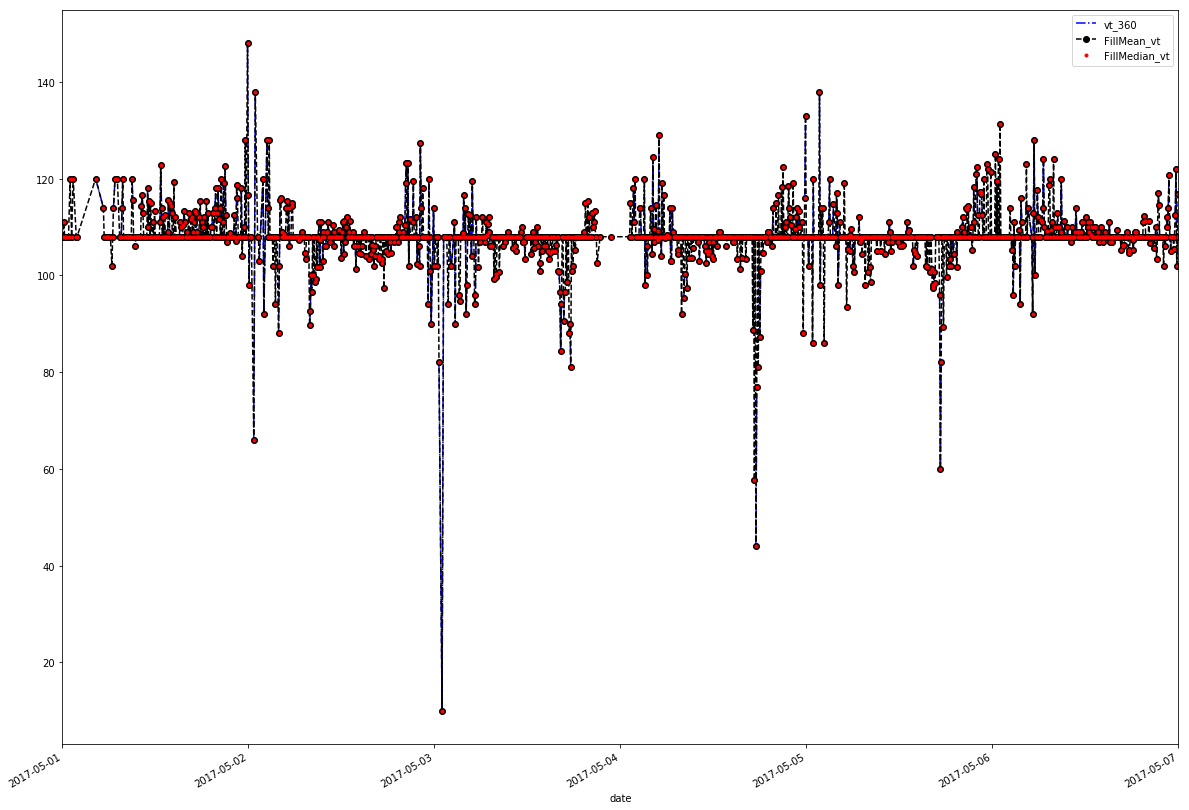

In [64]:
get_ipython().run_line_magic('matplotlib', 'inline')
styles=['b-.', 'ko--', 'r.','go--', 'rx-']
df_1[['vt_360','FillMean_vt','FillMedian_vt']].plot(style = styles ,figsize=(20,15));


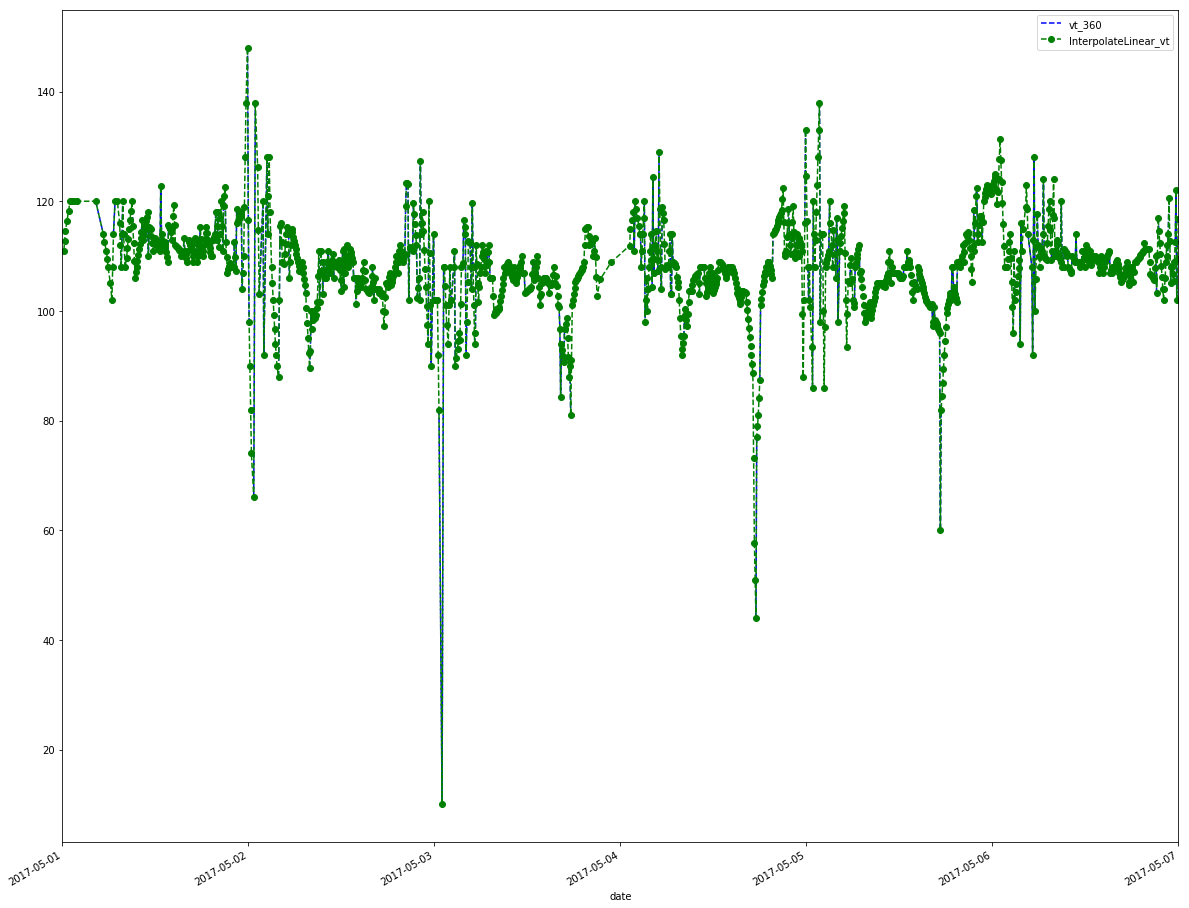

In [65]:
df_1[df_1.qt_360.isna()].head()
# In[ ]:


get_ipython().run_line_magic('matplotlib', 'inline')
styles=['b--', 'go--', 'r*', 'y^-','g-']
df_1[['vt_360','InterpolateLinear_vt']].plot(style = styles ,figsize=(20,17));


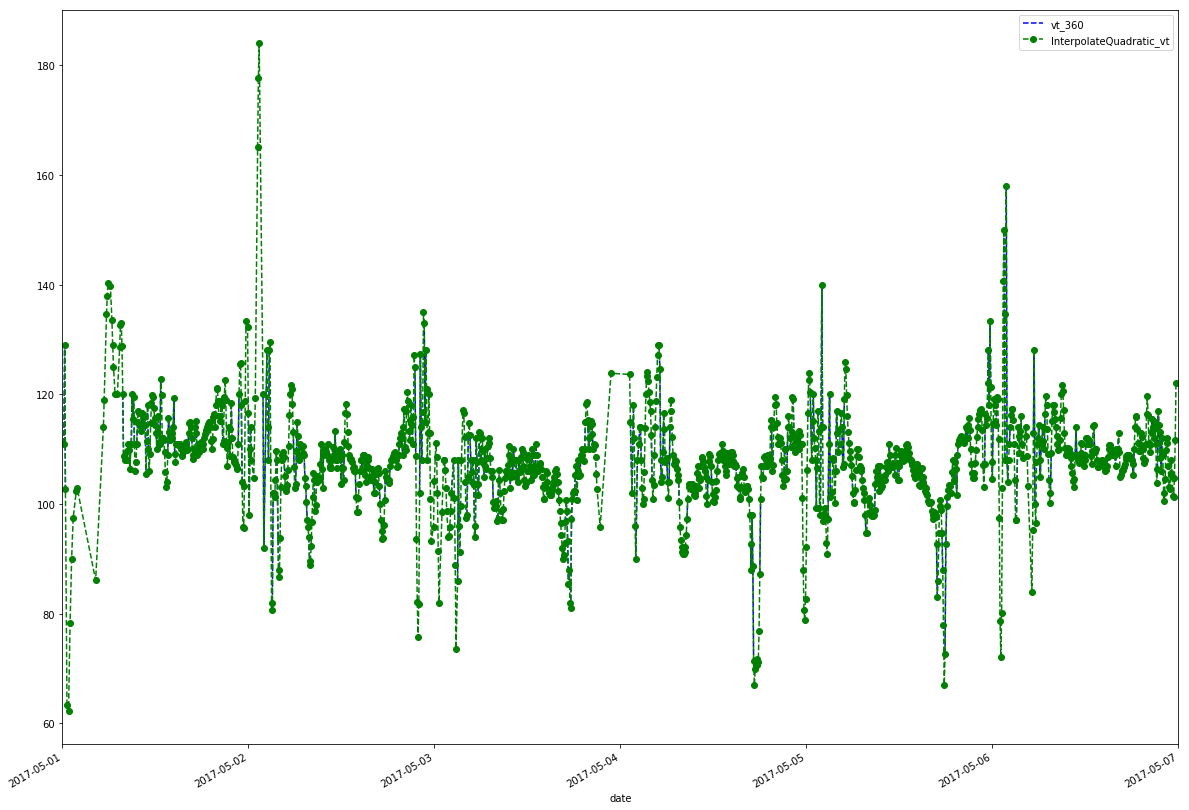

In [51]:

get_ipython().run_line_magic('matplotlib', 'inline')
#styles=['b-.', 'ko', 'r.','go--', 'rx-']
df_1[['vt_360','InterpolateQuadratic_vt']].plot(style = styles ,figsize=(20,15));



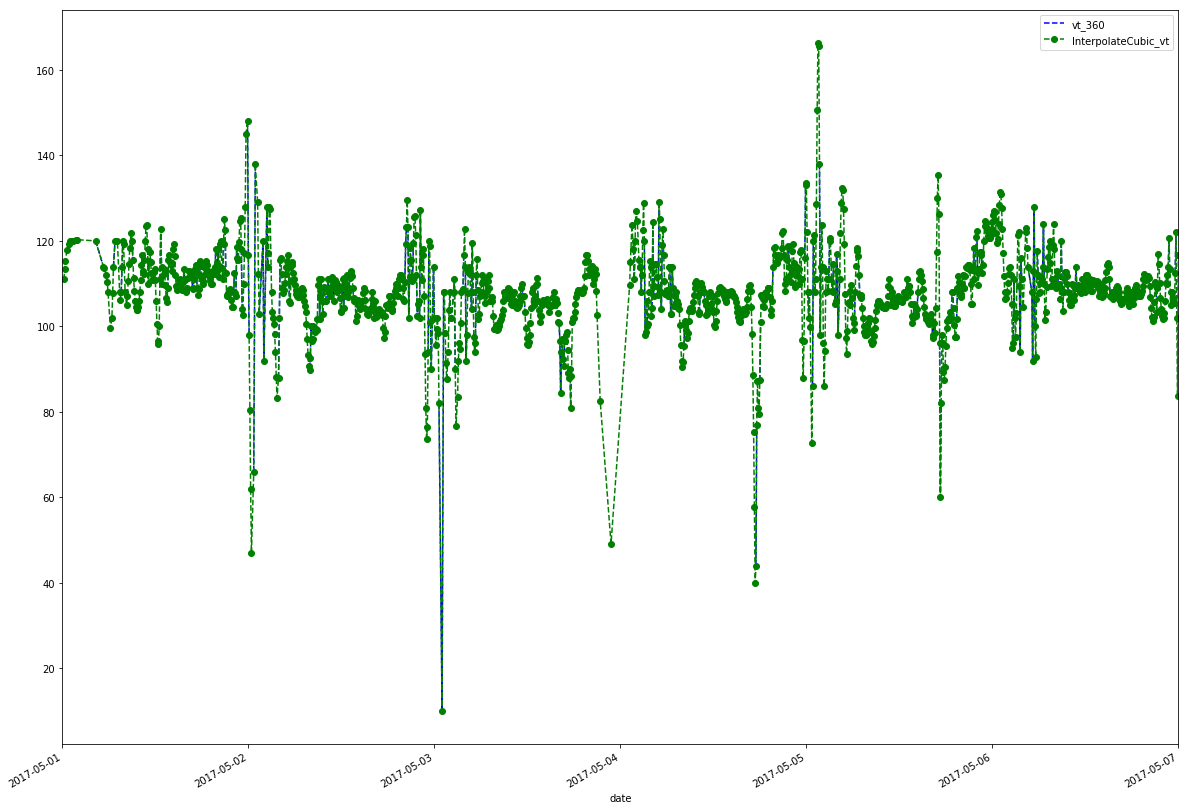

In [67]:

get_ipython().run_line_magic('matplotlib', 'inline')
df_1[['vt_360','InterpolateCubic_vt']].plot(style=styles,figsize=(20,15));



In [68]:
from sklearn.metrics import r2_score


r2_score(df_1.InterpolateCubic_vt, reference.vt_360)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [54]:
results = [(method, r2_score(reference.vt_360, df_1[method])) for method in list(df_1)[16:]]
results_df = pd.DataFrame(np.array(results), columns=['Method', 'R_squared'])
results_df#.sort_values(by='R_squared', ascending=False)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').